In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Set parameters

In [2]:
neighbors = 15
nPCs = 30
leiden_resolution = 1

In [3]:
path = "/home/levinsj/spatial/adata/individual_Samples/"

# run 1
adata0 = sc.read_h5ad(path + "HK3039_raw_noImages.h5ad")
adata1 = sc.read_h5ad(path + "HK2753_raw_noImages.h5ad")
adata2 = sc.read_h5ad(path + "HK2844_raw_noImages.h5ad")

# run 3
adata3 = sc.read_h5ad(path + "HK3035_raw_noImages.h5ad")
adata4 = sc.read_h5ad(path + "HK3106_raw_noImages.h5ad")
adata5 = sc.read_h5ad(path + "HK2874_raw_noImages.h5ad")

# run 4
adata6 = sc.read_h5ad(path + "HK2844_2_raw_noImages.h5ad")
adata7 = sc.read_h5ad(path + "HK3035_2_raw_noImages.h5ad")
adata8 = sc.read_h5ad(path + "HK2873_raw_noImages.h5ad")

# run 5
adata9 = sc.read_h5ad(path + "HK2401_raw_noImages.h5ad")
adata10 = sc.read_h5ad(path + "HK3542_raw_noImages.h5ad")
adata11 = sc.read_h5ad(path + "HK3063_raw_noImages.h5ad")
adata12 = sc.read_h5ad(path + "HK3531_raw_noImages.h5ad")

# run 6
adata13 = sc.read_h5ad(path + "HK3531_2_raw_noImages.h5ad")
adata14 = sc.read_h5ad(path + "HK2841_raw_noImages.h5ad")
adata15 = sc.read_h5ad(path + "Pediatric1_raw_noImages.h5ad")
adata16 = sc.read_h5ad(path + "HK2695_raw_noImages.h5ad")



In [4]:
samples = [adata0, adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11, adata12, adata13, adata14, adata15, adata16]
print(len(samples))

adata_merge = samples[0].concatenate(samples[1:],
    join="inner",
    batch_key="sample",
)

adata_merge.obs['fov']= adata_merge.obs['fov'].astype('int')

17


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype

In [5]:
print(adata_merge)

AnnData object with n_obs × n_vars = 3125326 × 1199
    obs: 'cell', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.B', 'Max.B', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.R', 'Max.R', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'slide_ID', 'Run_Tissue_name', 'Panel', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'sample', 'type', 'meanCounts_perFOV', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'version', 'unassignedTranscripts', 'Area.um2', 'pct_nuc', 'pct_mem', 'pct_cyt'
    var: 'green_counts', 'blue_counts', 'red_counts', 'yellow_counts', 'custom_probes-0', 'orig_probes-0', 'custom_probes-1', 'orig_probes-1', 'custom_probes-10', 'orig_probes-10', 'custom_probes-11', 'orig_probes-11', 'custom_probes-12', 'orig_probes-12', 'custom_probes-2', 'orig_probes-2', 'custom_probes-3', 'orig_probes-3', 'custom_probes-4', 'orig_

In [6]:
adata_merge.var_names

Index(['AATK', 'ABL1', 'ABL2', 'ACACB', 'ACE', 'ACKR1', 'ACKR3', 'ACKR4',
       'ACSL4', 'ACSM2B',
       ...
       'SystemControl90', 'SystemControl91', 'SystemControl92',
       'SystemControl93', 'SystemControl94', 'SystemControl95',
       'SystemControl96', 'SystemControl97', 'SystemControl98',
       'SystemControl99'],
      dtype='object', length=1199)

In [7]:
systemChecks = adata_merge.var_names.str.startswith('SystemControl')
neg_probes = adata_merge.var_names.str.startswith('Negative')

remove = np.add(neg_probes, systemChecks)
keep = np.invert(remove)

adata_merge = adata_merge[:,keep]

In [8]:
memCounts = adata_merge.layers["Membrane"].sum(axis=1)
nucCounts = adata_merge.layers["Nuclear"].sum(axis=1)
cytCounts = adata_merge.layers["Cytoplasm"].sum(axis=1)
totalCounts = adata_merge.X.sum(axis=1)

adata_merge.obs["pct_nuc"] = nucCounts/totalCounts
adata_merge.obs["pct_mem"] = memCounts/totalCounts
adata_merge.obs["pct_cyt"] = cytCounts/totalCounts

print(adata_merge.obs["pct_nuc"])

/tmp/ipykernel_253285/1810956620.py:6: RuntimeWarning: invalid value encountered in true_divide
  adata_merge.obs["pct_nuc"] = nucCounts/totalCounts
/tmp/ipykernel_253285/1810956620.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_merge.obs["pct_nuc"] = nucCounts/totalCounts


1_200-0       0.000000
2_200-0       0.000000
3_200-0       0.437500
4_200-0       0.000000
5_200-0       0.487179
                ...   
1295_34-16    0.000000
1296_34-16    0.000000
1297_34-16    0.000000
1298_34-16    0.000000
1299_34-16    0.000000
Name: pct_nuc, Length: 3125326, dtype: float64


/tmp/ipykernel_253285/1810956620.py:7: RuntimeWarning: invalid value encountered in true_divide
  adata_merge.obs["pct_mem"] = memCounts/totalCounts
/tmp/ipykernel_253285/1810956620.py:8: RuntimeWarning: invalid value encountered in true_divide
  adata_merge.obs["pct_cyt"] = cytCounts/totalCounts


In [9]:
print(adata_merge.obs["sample"].value_counts())

sample
0     396417
15    386233
2     334204
14    199480
1     184348
11    172196
9     164899
7     162031
6     143739
13    143646
10    138982
3     138708
8     135635
4     132615
5     114128
12    111541
16     66524
Name: count, dtype: int64


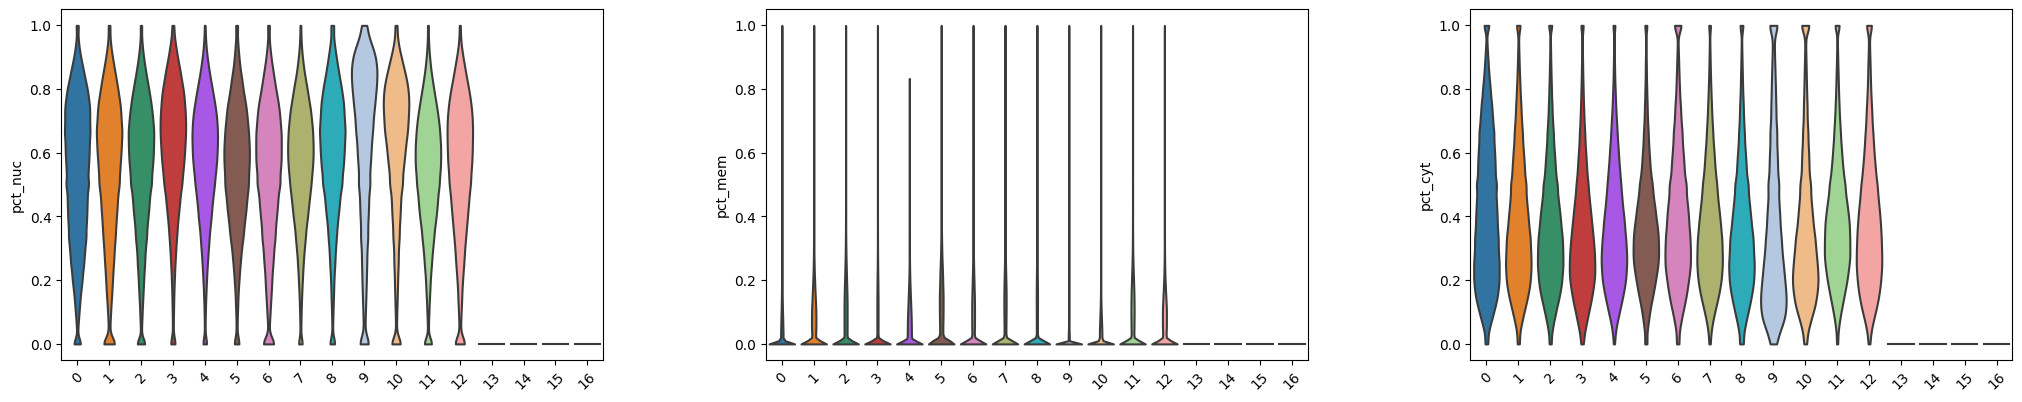

In [10]:
sc.pl.violin(adata_merge, keys = ['pct_nuc', 'pct_mem', 'pct_cyt'],  size = 0, groupby = 'sample', rotation= 45)

In [11]:
adata_merge.write_h5ad("/home/levinsj/spatial/adata/project_Files/Adult/adult_CosMx_preFilter.h5ad")
